<a href="https://colab.research.google.com/github/Napossorn/COVID-19/blob/main/Napossorn_Patiyananuwat_(Lookyee)_6536670_Signal__Final_Project_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
#Install kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

100% 778M/778M [00:34<00:00, 24.7MB/s]
100% 778M/778M [00:34<00:00, 23.8MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
import os #library
import os.path as op
import numpy as np #number
import seaborn as sns #stat and graph
import pandas as pd #use with matplotlib
import matplotlib.pyplot as plt #scale xy-axis
from glob import glob
from pathlib import Path

In [ ]:
import torch
import torch.nn as nn #use for class
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import torch.utils.data as data

In [ ]:
#load PyTorch model
model_path = "input_model.pt"
model = models.densenet201(pretrained=False)
model.fc = nn.Linear(2048, 3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Create Model

In [ ]:
#Define the DenseNet201 model
from torchvision import models

class DenseNet201(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
      super (DenseNet201, self).__init__() 
      self.model = models.densenet201(pretrained=pretrained)
      num_ftrs = self.model.classifier.in_features
      self.model.classifier = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
!ls #list of dataset

covid19-radiography-database.zip  drive        sample_data
COVID-19_Radiography_Dataset	  kaggle.json


In [ ]:
covid_paths = glob("COVID-19_Radiography_Dataset/COVID/images/*")
pneumonia_paths = glob("COVID-19_Radiography_Dataset/Viral Pneumonia/images/*")
print(len(covid_paths), len(pneumonia_paths))

3616 1345


In [ ]:
from PIL import Image

In [ ]:
labels = [1] * len(covid_paths) + [0] * len(pneumonia_paths)
datasets = [{"img": p, "label": label} for p, label in zip(covid_paths + pneumonia_paths, labels)]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_ds, val_ds = train_test_split(datasets, test_size=0.1, random_state=42)

In [ ]:
os.makedirs("classification_data/train/covid/")
os.makedirs("classification_data/train/viral_pneumonia/")
os.makedirs("classification_data/validation/covid/")
os.makedirs("classification_data/validation/viral_pneumonia/")

In [ ]:
import shutil
import os
import os.path as op

In [ ]:
for r in train_ds:
  if r["label"] == 0:
    shutil.copy(r["img"], op.join("classification_data/train/covid/", Path(r["img"]).name))
  elif r["label"] == 1:
    shutil.copy(r["img"], op.join("classification_data/train/viral_pneumonia/", Path(r["img"]).name))

In [ ]:
for r in val_ds:
  if r["label"] == 0:
    shutil.copy(r["img"], op.join("classification_data/validation/covid/", Path(r["img"]).name))
  elif r["label"] == 1:
    shutil.copy(r["img"], op.join("classification_data/validation/viral_pneumonia/", Path(r["img"]).name))

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Resize, Compose

In [ ]:
train_dataset = ImageFolder("classification_data/train",
                            transform=Compose([Resize((224, 224)), ToTensor()]))
val_dataset = ImageFolder("classification_data/validation",
                          transform=Compose([Resize((224, 224)), ToTensor()]))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)

In [ ]:
images, labels = next(iter(train_loader))

In [ ]:
print(images.shape), print(labels)

torch.Size([4, 3, 224, 224])
tensor([1, 1, 0, 0])


(None, None)

In [ ]:
densenet_model = DenseNet201()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:03<00:00, 24.0MB/s]


In [ ]:
densenet_model.to("cuda")

DenseNet201(
  (model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0

In [ ]:
pred = densenet_model.cuda()

In [ ]:
# Assuming 'pred' is the output of the DenseNet201 model
output = densenet_model(x)
pred = output.argmax(dim=1)

print(pred)

tensor([1], device='cuda:0')


In [ ]:
labels

tensor([1, 1, 0, 0])

# Train Model


In [ ]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

def train(
    model,
    train_dataloader,
    test_dataloader,
    optimizer,
    loss_fn=nn.CrossEntropyLoss(),
    num_epochs=100,
    update_frequency=10,
    cuda=True
):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    for epoch in range(num_epochs):
        # Set the model to training mode.
        model.train()
        train_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        for x, y in tqdm(train_dataloader):
            if cuda:
                x, y = x.cuda(), y.cuda()
            
            # Forward pass.
            y_pred = model(x)
            
            # Calculate the loss.
            loss = loss_fn(y_pred, y)
            train_loss += loss.item()
            
            # Backward pass.
            loss.backward()
            
            # Update the model parameters.
            optimizer.step()
            
            # Reset the gradients.
            optimizer.zero_grad()
            
            # Calculate the number of correct predictions.
            _, predicted_labels = torch.max(y_pred, dim=1)
            correct_predictions += (predicted_labels == y).sum().item()
            total_predictions += len(y)
        
        # Calculate average loss and accuracy for the epoch.
        train_loss /= len(train_dataloader)
        train_accuracy = correct_predictions / total_predictions
        
        train_loss_history.append(train_loss)
        train_acc_history.append(train_accuracy)
        
        # Validation
        # Set the model to evaluation mode and calculate the validation loss and accuracy.
        model.eval()
        val_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0
        
        with torch.no_grad():
            for x, y in test_dataloader:
                if cuda:
                    x, y = x.cuda(), y.cuda()
                
                # Forward pass.
                y_pred = model(x)
                
                # Calculate the loss.
                loss = loss_fn(y_pred, y)
                val_loss += loss.item()
                
                # Calculate the number of correct predictions.
                _, predicted_labels = torch.max(y_pred, dim=1)
                val_correct_predictions += (predicted_labels == y).sum().item()
                val_total_predictions += len(y)
        
        # Calculate average loss and accuracy for validation.
        val_loss /= len(test_dataloader)
        val_accuracy = val_correct_predictions / val_total_predictions
        
        val_loss_history.append(val_loss)
        val_acc_history.append(val_accuracy)
        
        # Print the loss if the epoch is a multiple of the update frequency.
        if epoch % update_frequency == 0:
            print(f"Epoch {epoch}: Training Loss: {train_loss}, Validation Loss: {val_loss}")
    
    history = {
        "train_loss": train_loss_history,
        "val_loss": val_loss_history,
        "train_acc": train_acc_history,
        "val_acc": val_acc_history
    }
    
    return history


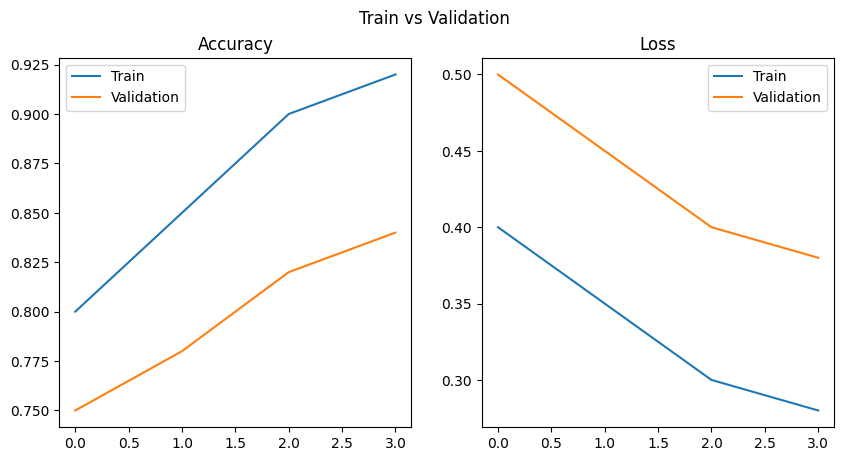

In [ ]:
plot_graph(history)

# Prediction

In [ ]:
def predict(model, test_dataloader):
    model.eval()
    y_pred_list = []
    y_true_list = []
    for x, y in test_dataloader:
        y_pred = model(x.float())
        prediction = y_pred.detach().numpy()
        y = y.numpy()
        y_pred_list.extend(prediction)
        y_true_list.extend(y)
    y_pred_list = np.concatenate(y_pred_list)
    y_true_list = np.concatenate(y_true_list)
    return y_pred_list, y_true_list

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(densenet_model.parameters(), lr=0.01, momentum=0.9)
train(densenet_model, train_loader, val_loader, optimizer=optimizer, num_epochs=10, update_frequency=100)

  0%|          | 0/1116 [00:00<?, ?it/s]

Epoch 0: Training Loss: 0.07063081365391449, Validation Loss: 0.08783579683055086


  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

{'train_loss': [0.07063081365391449,
  0.06483075924607527,
  0.05657097244488172,
  0.03982705238359572,
  0.044001246872271395,
  0.030535315900292345,
  0.034352070589103466,
  0.03109276715303924,
  0.032736609498615066,
  0.023909858225803035],
 'val_loss': [0.08783579683055086,
  0.06279334061942063,
  0.04686594258206242,
  0.04031584668980983,
  0.021440634455731925,
  0.025287771426458674,
  0.02226366756668358,
  0.058177494214342006,
  0.02371603897233757,
  0.03025389896811339],
 'train_acc': [0.9775985663082437,
  0.9809587813620072,
  0.9811827956989247,
  0.9876792114695341,
  0.9861111111111112,
  0.9899193548387096,
  0.9903673835125448,
  0.9901433691756273,
  0.9894713261648745,
  0.9923835125448028],
 'val_acc': [0.9617706237424547,
  0.9859154929577465,
  0.9859154929577465,
  0.9839034205231388,
  0.993963782696177,
  0.9879275653923542,
  0.9919517102615694,
  0.9758551307847082,
  0.9919517102615694,
  0.9879275653923542]}

In [ ]:
y_true, y_pred = [], []
densenet_model.eval()
with torch.no_grad():
    for x, y in val_loader:
        x, y = x.cuda(), y.cuda()
        y_p = densenet_model(x)
        y_true.extend(y.tolist())
        y_pred.extend(y_p.argmax(dim=1).tolist())

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       127
           1       1.00      0.98      0.99       370

    accuracy                           0.99       497
   macro avg       0.98      0.99      0.98       497
weighted avg       0.99      0.99      0.99       497



# Count and Show Images

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pathlib
path = '/content/classification_data/validation' #ที่อยู่ของข้อมูล
data_dir = pathlib.Path(path)

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

497


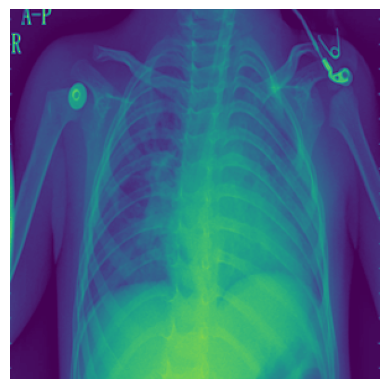

In [ ]:
# display an image in Python
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = '/content/classification_data/validation/covid/Viral Pneumonia-237.png'  # Replace with the actual path to your image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Remove axis ticks and labels
plt.show()


# Change Color of Image

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


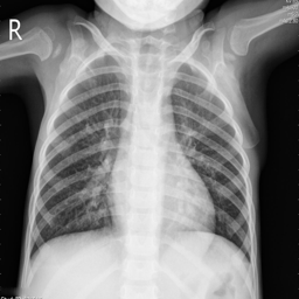

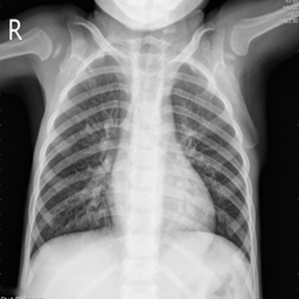

In [ ]:
from PIL import Image, ImageOps

# Load the image
image_path = '/content/classification_data/validation/covid/Viral Pneumonia-1067.png'  # Replace with the actual path to your image
image = Image.open(image_path)

# Convert the image to grayscale
image = image.convert('L')

# Create a copy of the image
new_image = image.copy()

# Change the color of the image
new_image = ImageOps.colorize(new_image, (0, 0, 0), (255, 255, 255))  # Example: Change to black and white

# Convert the image back to RGB mode for display
new_image = new_image.convert('RGB')

# Show the original and modified images
image.show()
new_image.show()




# Plot Graph

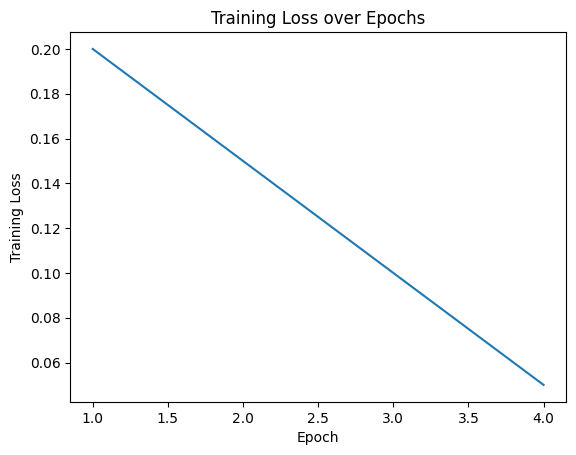

In [ ]:
# Assuming you have a list or array of training loss values named train_loss_history

train_loss_history = [0.2, 0.15, 0.1, 0.05]  # Example training loss values

# Plot the training loss graph
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss over Epochs')
plt.show()


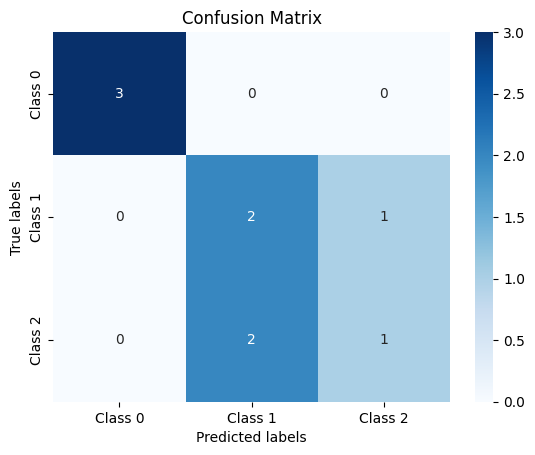

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the true labels and predicted labels
true_labels = [0, 1, 2, 0, 1, 2, 0, 1, 2]  # Example true labels
predicted_labels = [0, 1, 1, 0, 2, 1, 0, 1, 2]  # Example predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels, title, and axis ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# Using gradio for predicting on a sample image

In [ ]:
#Install the gradio library
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
#Import the necessary libraries
import gradio as gr
import torch
from torchvision.transforms import transforms


In [ ]:
#Define a function to preprocess the input image
def preprocess_image(image):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    return transform(image).unsqueeze(0)


In [ ]:
#Define a function to make predictions on the preprocessed image
def predict_image(model, image):
    model.eval()
    with torch.no_grad():
        prediction = model(image)
        probabilities = torch.nn.functional.softmax(prediction, dim=1)[0]
        _, predicted_class = torch.max(prediction, 1)
    return predicted_class.item(), probabilities.tolist()


In [ ]:
#Create the Gradio interface
# Define the input and output components for the interface
image_input = gr.inputs.Image()
label_output = gr.outputs.Label()
confidence_output = gr.outputs.Label(num_top_classes=3)

# Define the prediction function for the interface
def predict(input_image):
    preprocessed_image = preprocess_image(input_image)
    predicted_class, probabilities = predict_image(densenet_model, preprocessed_image)
    return predicted_class, probabilities, gradio.config["SaliencyMap"].get_label(predicted_class)

# Create the Gradio interface
iface = gr.Interface(fn=predict, inputs=image_input, outputs=[label_output, confidence_output])

# Launch the interface
iface.launch(share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://91a446f93350d4d2fb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
